## Impact of Federated Learning on User Experience: Time to Initial Display (TTID) Analysis

This notebook contains the analysis of the time to initial display (TTID) metric for the federated learning (FL) and idle scenaio. The TTID metric measures the time it takes for an app to produce its first frame, including process initialization during a cold start, activity creation during a cold or warm start, and displaying first frame. The data is stored in a CSV file named `ttid_data.csv`.

### Motivation

The goal of the experiment was to understand the impact of FL on user experience. The TTID metric was chosen because it is a key metric to measure the impact of FL on the app startup time. The TTID metric is measured in milliseconds (ms). The lower the TTID, the better the user experience.

#### The two key questions we want to answer are:
<ul>
    <li>How does ttid vary under FL vs idle scenario?</li>
    <li>Are the phones with low GB RAM impacted more than the phones with high GB RAM?</li>
</ul>



### Experiment

#### Data Description
<ul>
    <li> The attributes of ttid dataset are: <b>package_name, mobile_name, ttid_under_FL, ttid_under_idle</b></li>
    <li> The data is collected from three different phones: <b>Nokia 1 (1GB RAM), Nexus 6p (3GB RAM), Samsung s9 plus (6GB RAM)</b></li>
    <li> The data is collected for three different apps: <b>Youtube, Camera, and Chrome</b></li>
    <li> The data is collected for two different scenarios: <b>FL and idle</b></li>
    <li> The data is collected has 100 samples of each app for each scenario for each phone</li>
</ul>

#### Experiment Design  (can add more detail shazer if required)

We measured the ttid for each app under FL and idle scenario for each phone. We ran a bash script to launch the three apps via adb 100 times and sampled their ttid under FL and idle scenario.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [101]:
#for nokia 1
# df = pd.read_csv('ttid_dataset.csv')
# df_more_data = pd.read_csv('with_fl.csv')
# df_more_data_no_fl = pd.read_csv('without_fl.csv')
# df_more_data = df_more_data.rename(columns={'total_time': 'ttid_under_FL'})
# df_more_data_no_fl = df_more_data_no_fl.rename(columns={'total_time': 'ttid_under_Idle'})
# df_more_data['ttid_under_Idle'] = df_more_data_no_fl['ttid_under_Idle']


# df = pd.concat([df, df_more_data])
# #in mobile name column add nokia 1 for all the rows
# df['mobile_name'] =  'nokia 1'
# # check if null values are present
# # drop null values
# df = df.dropna()
# # change type of ttid_under_FL and ttid_under_Idle to int
# df['ttid_under_FL'] = df['ttid_under_FL'].astype(int)
# df['package_name'] = df['package_name'].replace('com.google.android.youtube', 'Youtube')
# df['package_name'] = df['package_name'].replace('com.hmdglobal.camera2lite', 'Camera')
# df['package_name'] = df['package_name'].replace('com.android.chrome', 'Chrome')
# df.to_csv('ttid_dataset1.csv', index=False)


In [102]:
#for nexus 
# df = pd.read_csv('with_fl.csv')
# df = df.rename(columns={'total_time': 'ttid_under_FL'})
# df_nofl = pd.read_csv('without_fl_nex.csv')
# df_nofl = df_nofl.rename(columns={'total_time': 'ttid_under_Idle'})
# #print number of rows in df_nofl and df
# df['ttid_under_Idle'] = df_nofl['ttid_under_Idle']
# df['mobile_name'] =  'nexus 6p'
# df = df.dropna()
# df['ttid_under_FL'] = df['ttid_under_FL'].astype(int)
# df['package_name'] = df['package_name'].replace('com.google.android.youtube', 'Youtube')
# df['package_name'] = df['package_name'].replace('google.android.GoogleCamera', 'Camera')
# df['package_name'] = df['package_name'].replace('com.google.android.GoogleCamera', 'Camera')
# df['package_name'] = df['package_name'].replace('com.android.chrome', 'Chrome')

# df.to_csv('ttid_dataset2.csv', index=False)

In [103]:
# #for s9 plus
# df = pd.read_csv('with_fl.csv')
# df = df.rename(columns={'total_time': 'ttid_under_FL'})
# df_nofl = pd.read_csv('without_fl.csv')
# df_nofl = df_nofl.rename(columns={'total_time': 'ttid_under_Idle'})
# #print number of rows in df_nofl and df
# df['ttid_under_Idle'] = df_nofl['ttid_under_Idle']
# df['mobile_name'] =  'samsung s9 plus'
# df = df.dropna()
# df['ttid_under_FL'] = df['ttid_under_FL'].astype(int)
# df['package_name'] = df['package_name'].replace('com.google.android.youtube', 'Youtube')
# df['package_name'] = df['package_name'].replace('com.sec.android.app.camera', 'Camera')
# df['package_name'] = df['package_name'].replace('com.android.chrome', 'Chrome')

# df.to_csv('ttid_dataset3.csv', index=False)



In [104]:
# #combine all the datasets
# df1 = pd.read_csv('ttid_dataset1.csv')
# df2 = pd.read_csv('ttid_dataset2.csv')
# df3 = pd.read_csv('ttid_dataset3.csv')
# df = pd.concat([df1, df2, df3])
# df.to_csv('ttid_dataset.csv', index=False)


### EDA for TTID

Visualizing the data to understand the distribution of ttid under FL and idle scenario for each app for each phone.

<ul>
    <li> For nokia 1 we can observe that the ttid is higher under FL scenario than idle scenario for all the apps. The difference is more pronounced for Youtube and Camera app. </li>
    <li> For Nexus 6p we can observe that the ttid is higher under FL scenario than idle scenario for all the apps. The difference is not as pronounced as Nokia 1. </li>
    <li> For Samsung s9 plus we can observe that the ttid is almost similar under FL scenario and idle scenario for all the apps. </li>
</ul>

Note for shazer chrome app on s9 anamoly explaned later

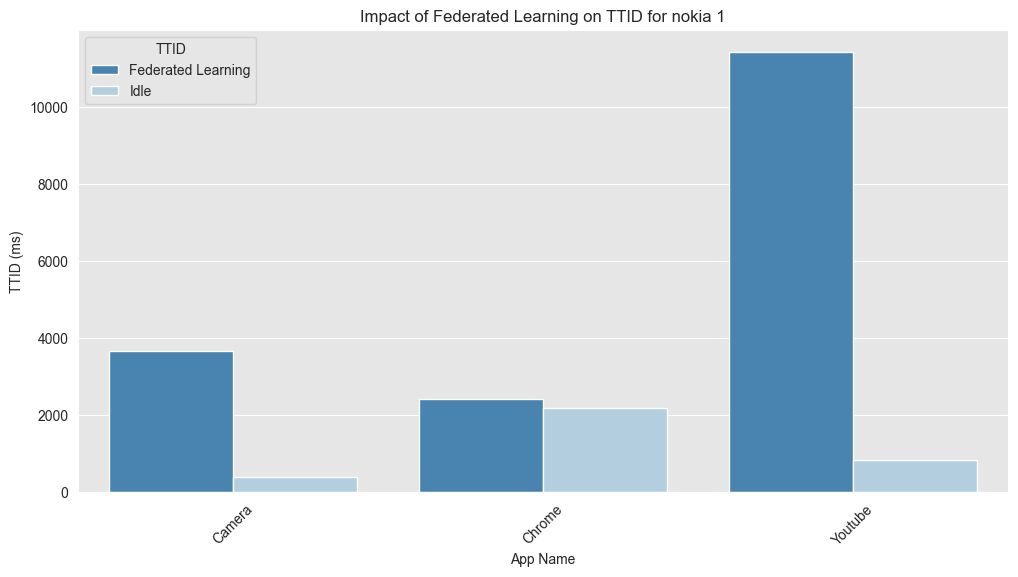

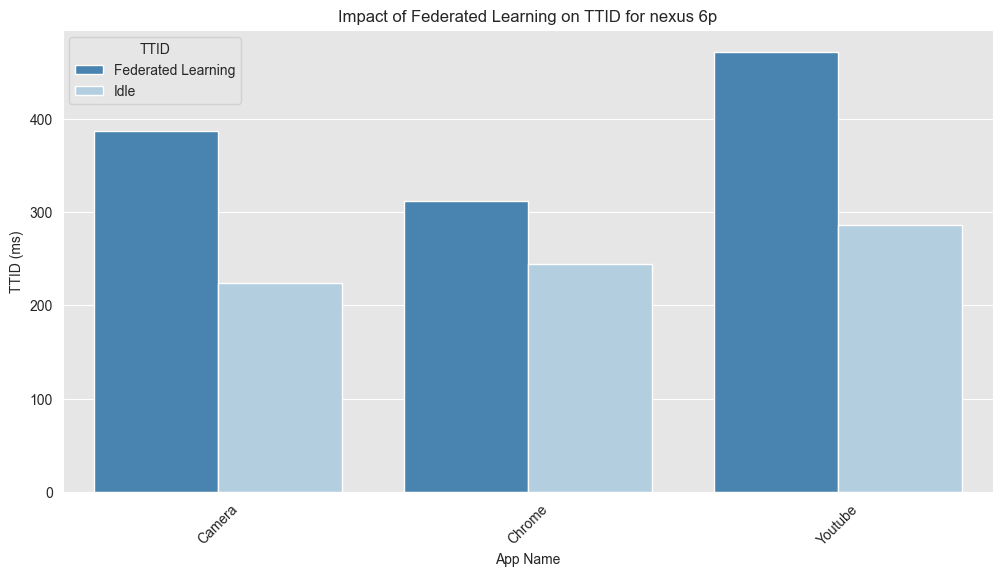

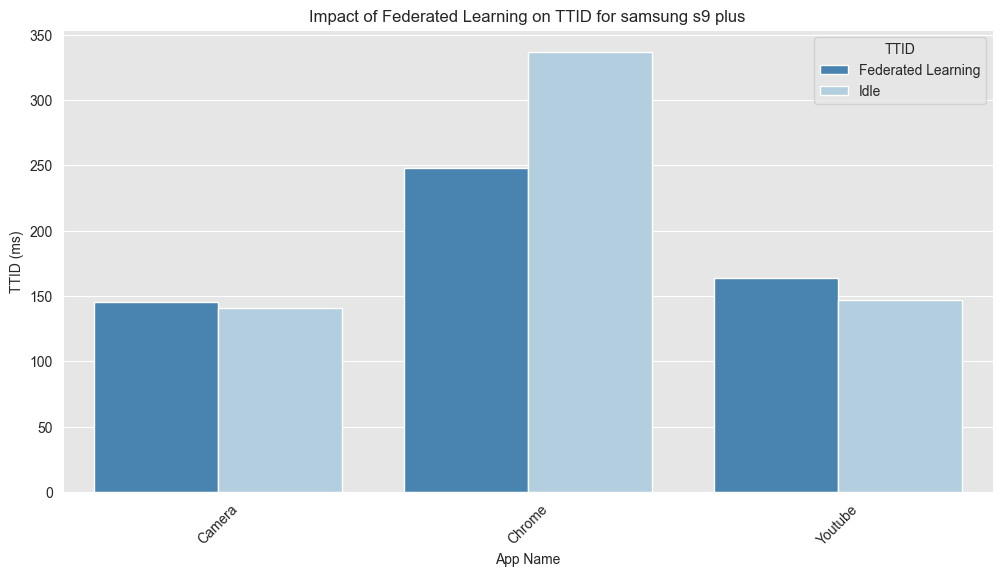

In [19]:

df = pd.read_csv('ttid_dataset.csv')
# replace package name with app name
unique_mobile_names = df['mobile_name'].unique()
for mobile_name in unique_mobile_names:
    filter_df = df[df['mobile_name'] == mobile_name]
    plt.figure(figsize=(12, 6))

    mean_df = filter_df.groupby('package_name').agg({'ttid_under_FL': 'mean', 'ttid_under_Idle': 'mean'}).reset_index()
    # rename columns
    mean_df = mean_df.rename(columns={'ttid_under_FL': 'Federated Learning', 'ttid_under_Idle': 'Idle'})
   
    mean_df_melted = mean_df.melt(id_vars='package_name', var_name='TTID', value_name='mean_ttid')
    sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
   
    sns.barplot(x='package_name', y='mean_ttid', hue='TTID', data=mean_df_melted, palette='Blues_r')
    plt.xticks(rotation=45)
    plt.xlabel('App Name')
    # #legend 
    # plt.legend(title='TTID', loc='upper left', labels=['Federated Learning', 'Idle'], color=['#1f77b4', '#ff7f0e'])

    plt.ylabel('TTID (ms)')
    plt.title('Impact of Federated Learning on TTID for ' + mobile_name)



    plt.show()





### Statistical Analysis : Hypothesis Testing relevant to the two key questions

#### Question 1: How does ttid vary under FL vs idle scenario?

##### Null Hypothesis: There is no difference in the ttid under FL and idle scenario for each app for each phone.
##### Alternate Hypothesis: There is an increase in the ttid under FL scenario than idle scenario for each app for each phone.
##### Statistical Test: two sample t-test
##### One tail test: We are only interested in the increase in ttid under FL scenario than idle scenario.
##### Confidence Interval: 95%

<ul>
    <li> For nokia 1 we can observe that the p-value is less than 0.05 for all the apps. Hence we reject the null hypothesis and conclude that there is an increase in the ttid under FL scenario than idle scenario for all the apps. The p-value for youtube is 1.573675e-56 and the confidence interval is [  9927.400232520487, 11232.089563397882]. The p-value for camera is 5.829566e-32 and the confidence interval is [  2890.3605494143158, 3636.306117252351]. The p-value for chrome is 1.771463e-01 and the confidence interval is [ -233.1821575267992, 680.8387231833646]. (Shazer note for u : confidence interval here basically is the range for difference in ttid between FL and idle scenario so for youtube under fl ttitd is around 10 to 12k ms more than idle scenario. the distribution graph like for youtube in nokia 1 show that blue bar with largest are is around 12000 mark . large bar mean more samples in that range. wheeras for without fl the orange bar largest area is around 200ms) </li> <br>

   <li> For nexus 6p we can observe that the p-value is less than 0.05 for all the apps. Hence we reject the null hypothesis and conclude that there is an increase in the ttid under FL scenario than idle scenario for all the apps. The p-value for youtube is 2.893462e-42 and the confidence interval is [  152.60469178445277, 217.43571225595127]. The p-value for camera is 1.466406e-37 and the confidence interval is [  148.1980618553585, 177.47870582140916]. The p-value for chrome is 4.713929e-17 and the confidence interval is [  59.31382480526207, 74.92859943716223]. (shazer do similar kind of analysis for distribution and confidence interval value in report. only pick one of the significant app graph dont do for all) </li> <br>

  <li> For samsung s9 plus we can observe that the p-value is greater than 0.05 for Chrome app. Hence we fail to reject the null hypothesis and conclude that there is no difference in the ttid under FL scenario and idle scenario for Chrome app. The p-value for youtube is 5.420338e-07 and the confidence interval is [  11.267585104431834, 22.409182572335833]. The p-value for camera is 1.139047e-02 and the confidence interval is [  0.73475938170799, 7.810695163746571]. We reject the null hypothesis and conclude that there is an increase in the ttid under FL scenario than idle scenario for camera app and youtube app. However, in s9 plus the p-value is much higher and confidence interval  is much lower than nokia 1 and nexus 6p and the difference in ttid is not as pronounced as nokia 1 and nexus 6p.(note to shazer see how conf interval diminishing which shows that highend mobile dont have much diff in fl and no fl mean little impact of fl) </li>
</ul>

note shazer for graphs only pick few significant one to convey the message in report dont do for all
    

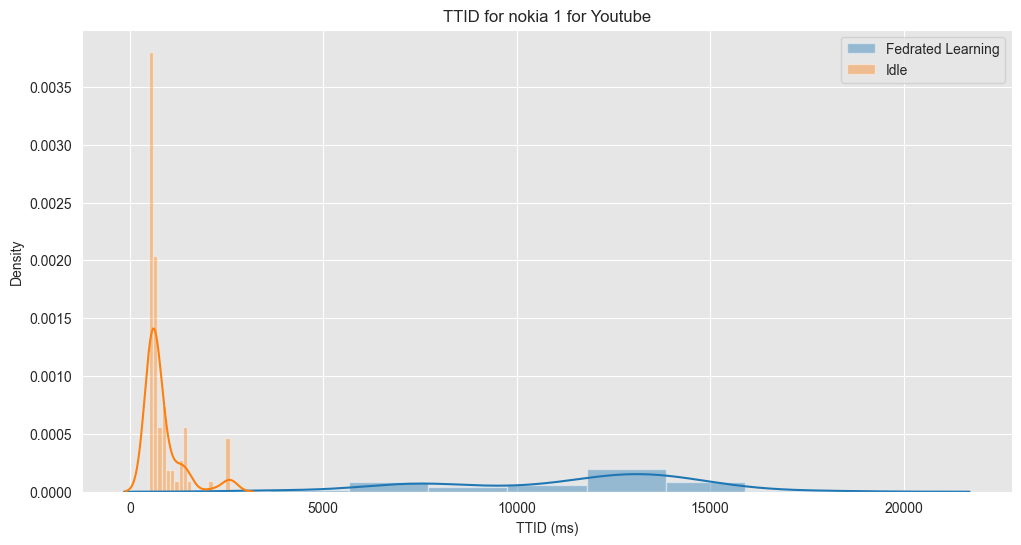

Confident Interval:  (9927.400232520487, 11232.089563397882)


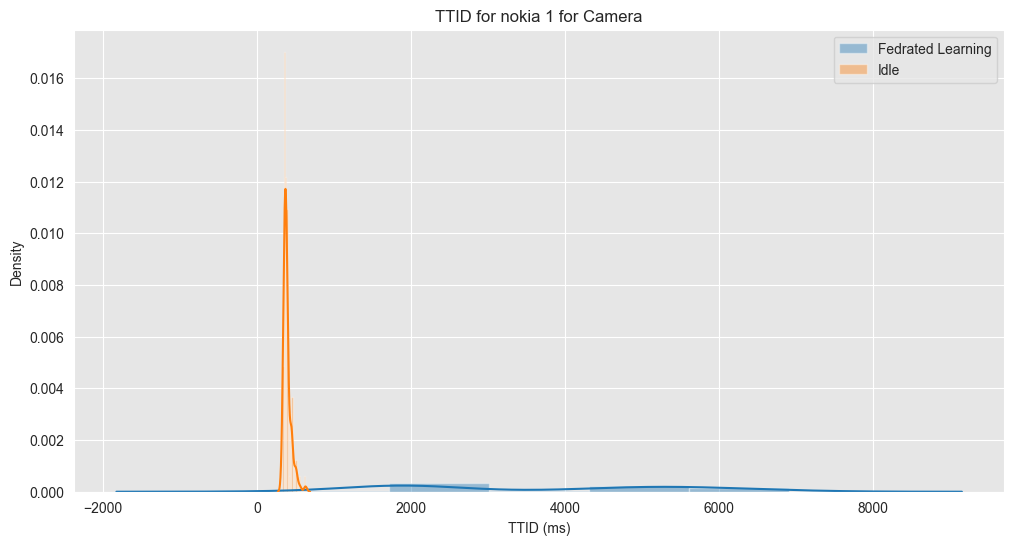

Confident Interval:  (2890.3605494143158, 3636.306117252351)


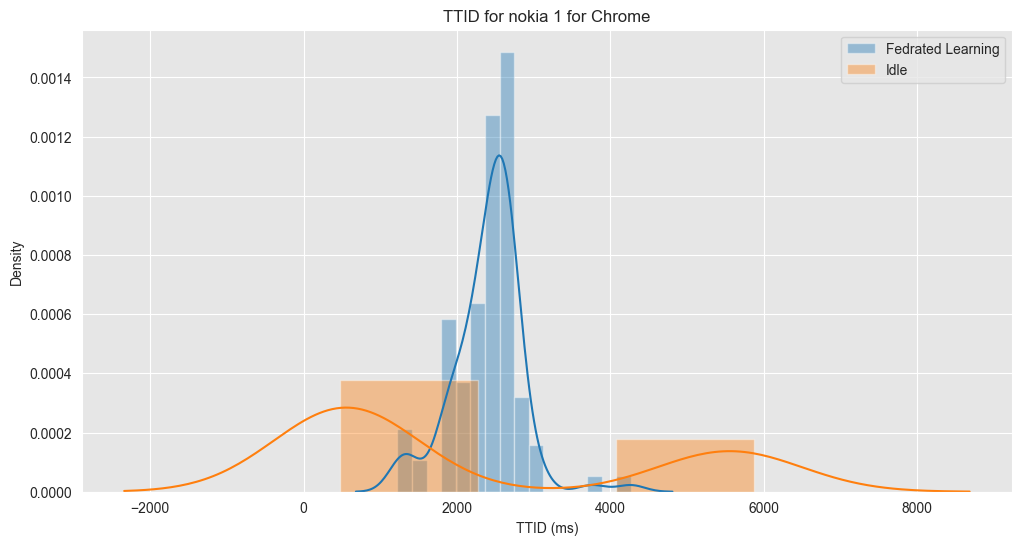

Confident Interval:  (-233.1821575267992, 680.8387231833646)
                          lower_bound       p_value   upper_bound
package_name mobile_name                                         
Camera       nokia 1      2890.360549  5.829566e-32   3636.306117
Chrome       nokia 1      -233.182158  1.771463e-01    680.838723
Youtube      nokia 1      9927.400233  1.573675e-56  11232.089563


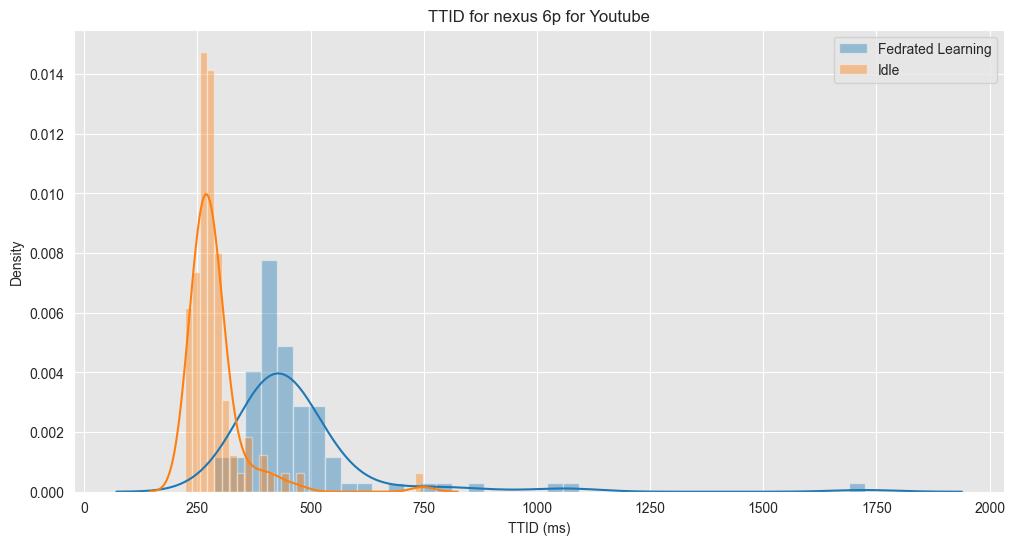

Confident Interval:  (152.60469178445277, 217.43571225595127)


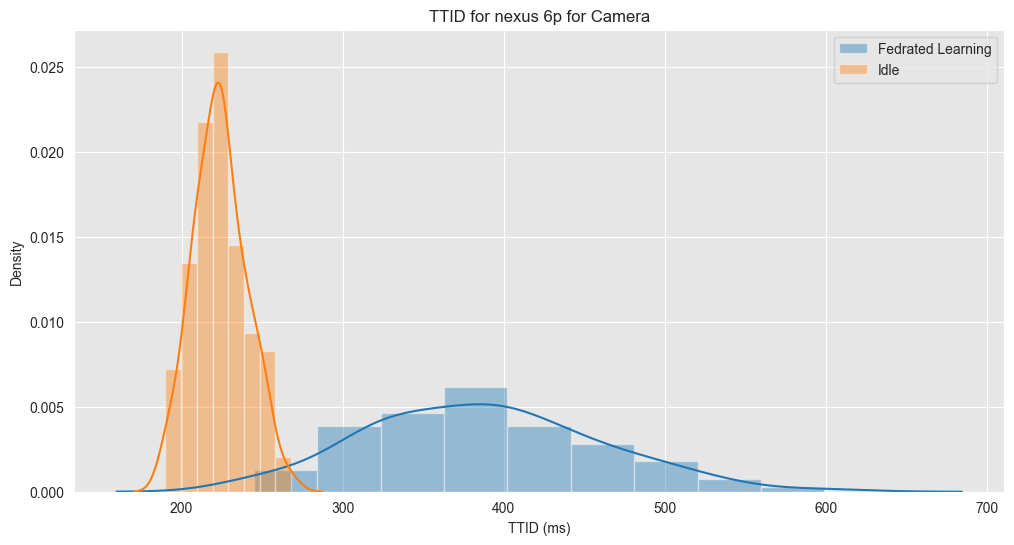

Confident Interval:  (148.1980618553585, 177.47870582140916)


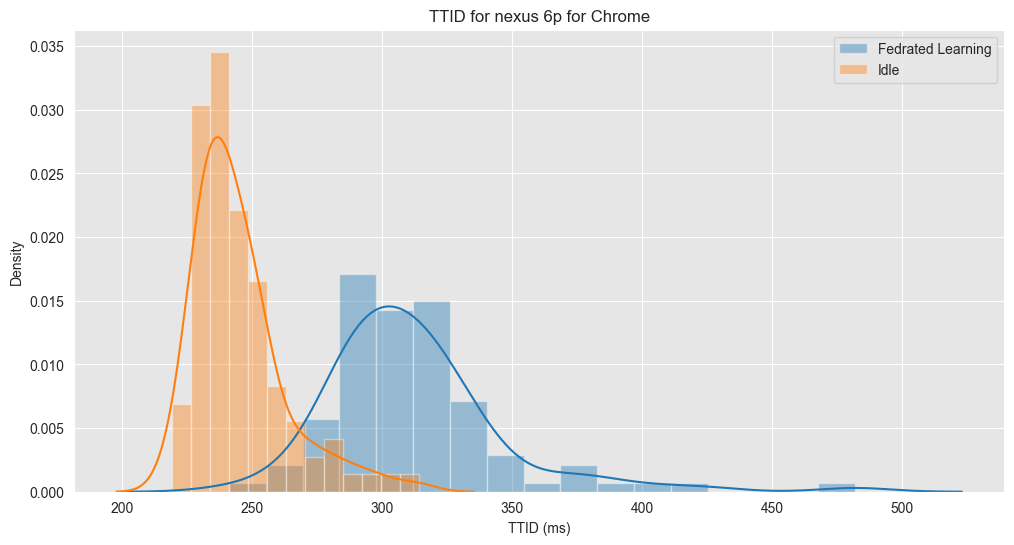

Confident Interval:  (59.31382480526207, 74.92859943716223)
                          lower_bound       p_value  upper_bound
package_name mobile_name                                        
Camera       nexus 6p      148.198062  2.893462e-42   177.478706
Chrome       nexus 6p       59.313825  1.466406e-37    74.928599
Youtube      nexus 6p      152.604692  4.713929e-17   217.435712


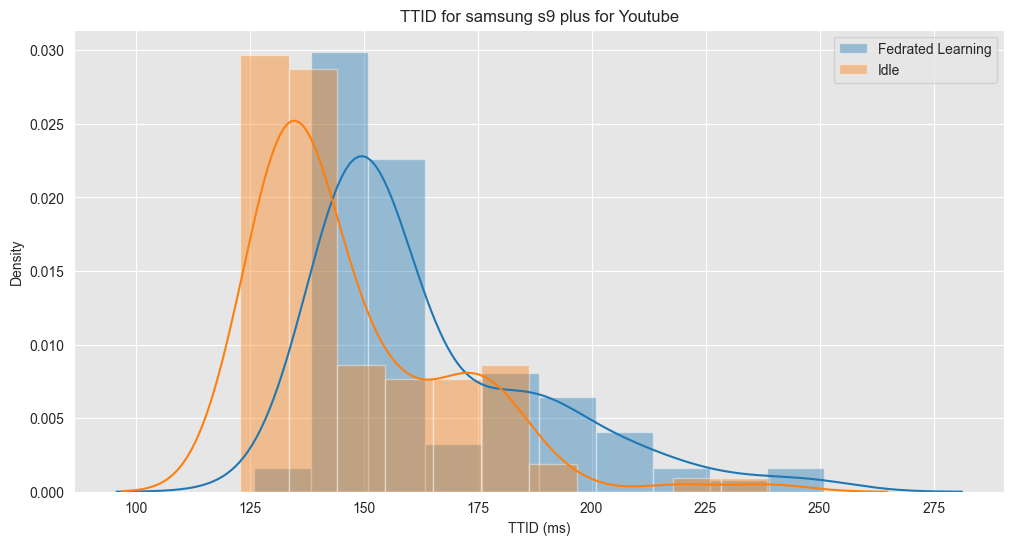

Confident Interval:  (11.267585104431834, 22.409182572335833)


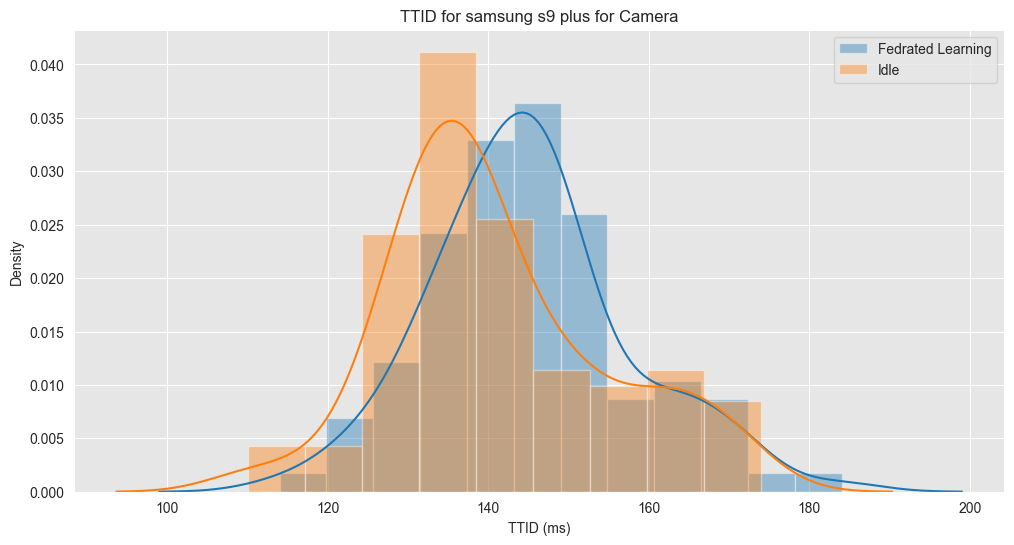

Confident Interval:  (0.73475938170799, 7.810695163746571)


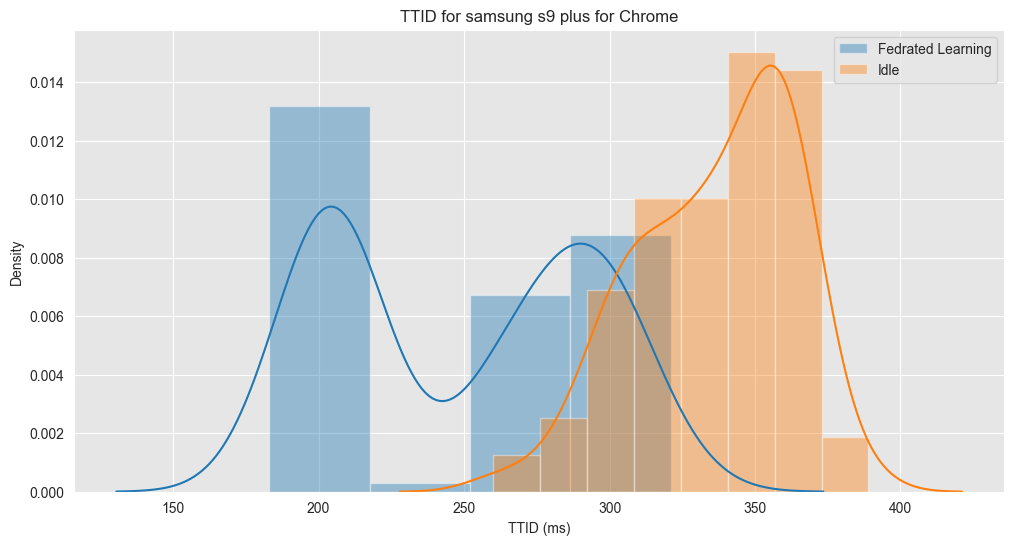

Confident Interval:  (-100.56295895231627, -76.30572791637057)
                              lower_bound       p_value  upper_bound
package_name mobile_name                                            
Camera       samsung s9 plus     0.734759  1.139047e-02     7.810695
Chrome       samsung s9 plus  -100.562959  1.000000e+00   -76.305728
Youtube      samsung s9 plus    11.267585  5.420338e-07    22.409183


In [20]:

unique_package_names = df['package_name'].unique()

for mobile_name in unique_mobile_names:
    p_val = []
    lower_bound = []
    upper_bound = []
    for package_name in unique_package_names:
        filter_df = df[(df['mobile_name'] == mobile_name) & (df['package_name'] == package_name)]
        plt.figure(figsize=(12, 6))
        #supress warnings
        import warnings
        warnings.filterwarnings('ignore')
        
        sns.distplot(filter_df['ttid_under_FL'], label='Fedrated Learning')
        sns.distplot(filter_df['ttid_under_Idle'], label='Idle')
        plt.xlabel('TTID (ms)')
        plt.ylabel('Density')
        plt.legend()
        plt.title('TTID for ' + mobile_name + ' for ' + package_name)
        plt.show()

        
        t_test_filter = filter_df[['ttid_under_FL', 'ttid_under_Idle']]
        # t_test_youtube.head(20)
        t_test = stats.ttest_ind(t_test_filter['ttid_under_FL'], t_test_filter['ttid_under_Idle'], equal_var=False, alternative='greater')
        diff = t_test_filter['ttid_under_FL'].mean() - t_test_filter['ttid_under_Idle'].mean()
        confident_interval = stats.t.interval(0.95, len(t_test_filter['ttid_under_FL'])-1, loc=diff, scale=stats.sem(t_test_filter['ttid_under_FL'] - t_test_filter['ttid_under_Idle']))
        # print(package_name, t_test)
        print("Confident Interval: ", confident_interval)
        p_val.append(t_test[1])
        lower_bound.append(confident_interval[0])
        upper_bound.append(confident_interval[1])
    
    #create a dataframe
    data = {
    'package_name': unique_package_names,
    'mobile_name': [mobile_name] * len(unique_package_names),
    'p_value': p_val,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound
    }
    t_test_df = pd.DataFrame(data)
    #df = pd.DataFrame(data)

    # Create a pivot table
    pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                             index=['package_name', 'mobile_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

    
    # save
    # pivot_table.to_csv(f'p_value_{mobile_name}.csv')
    print(pivot_table)
        # #graphical representation
        # plt.figure(figsize=(12, 6))
        # sns.distplot(t_test_youtube['ttid_under_FL'], label='FL')
        # sns.distplot(t_test_youtube['ttid_under_Idle'], label='Idle')
        # plt.legend()
        # plt.title('Youtube')
        # plt.show()




    

#### Question 2: Are the phones with low GB RAM impacted more than the phones with high GB RAM?

##### Null Hypothesis: There is no difference in the ttid under FL for nokia 1 and nexus 6p in each app.
##### Alternate Hypothesis: There is an increase in the ttid under FL for nokia 1 than nexus 6p in each app.
##### Statistical Test: two sample t-test
##### One tail test: We are only interested in the increase in ttid under FL for nokia 1 than nexus 6p in each app.
##### Confidence Interval: 95%

<ul> 
    <li> For youtube app we can observe that the p-value is less than 0.05. Hence we reject the null hypothesis and conclude that there is an increase in the ttid under FL for nokia 1 than nexus 6p. The p-value is 8.470994e-57 and the confidence interval is [ 10324.458294222166, 11567.979553644253]. (Note shazer confidence intervl show the difference betwween ttid for yt on nokia 1 and nexus 6p . the ttid of nokia is much higher)</li> <br>
    <li> For camera app we can observe that the p-value is less than 0.05. Hence we reject the null hypothesis and conclude that there is an increase in the ttid under FL for nokia 1 than nexus 6p. The p-value is 5.151872e-32 and the confidence interval is [ 2899.0750169094813, 3636.6623568278924]. </li> <br>
    <li> For chrome app we can observe that the p-value is less than 0.05. Hence we reject the null hypothesis and conclude that there is an increase in the ttid under FL for nokia 1 than nexus 6p. The p-value is 8.629060e-69 and the confidence interval is [ 2000.371201950979, 2179.3055657257887]. </li> <br>
</ul>

note shazer overall the ttid for nokia 1 is much higher than nexus 6p for all the apps. the difference is more pronounced for youtube and camera app. for chrome app the difference is not as pronounced as youtube and camera app.


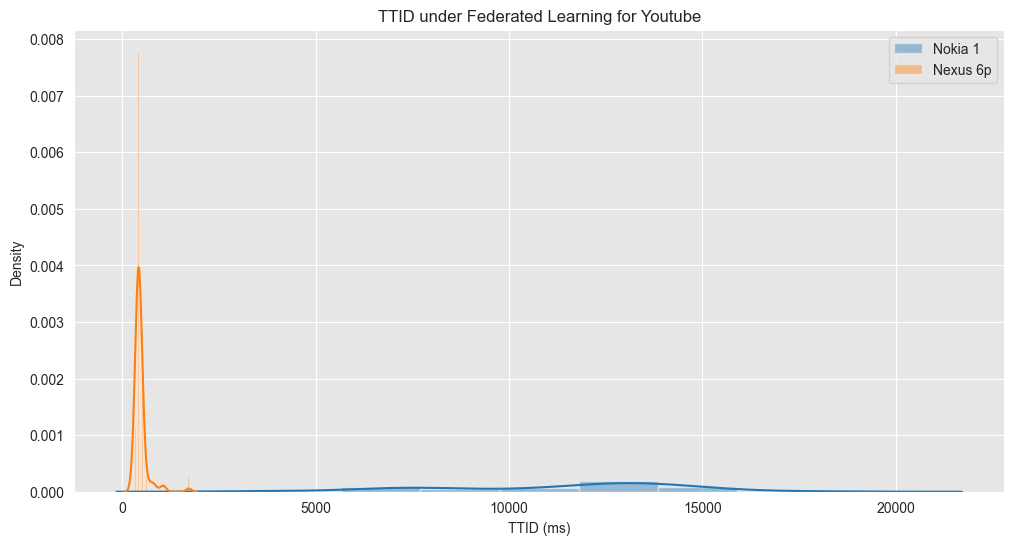

Confident Interval:  (10324.458294222166, 11567.979553644253)


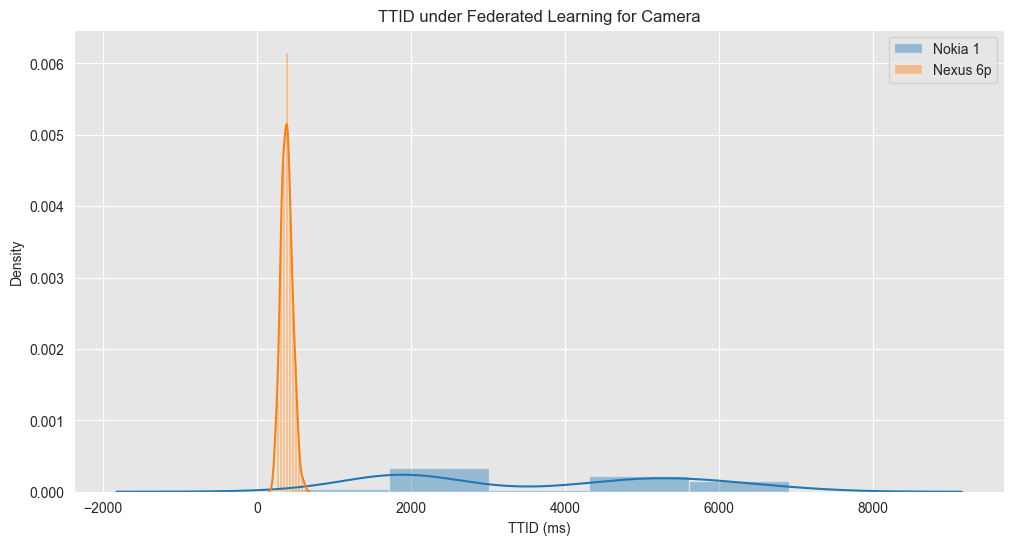

Confident Interval:  (2899.0750169094813, 3636.6623568278924)


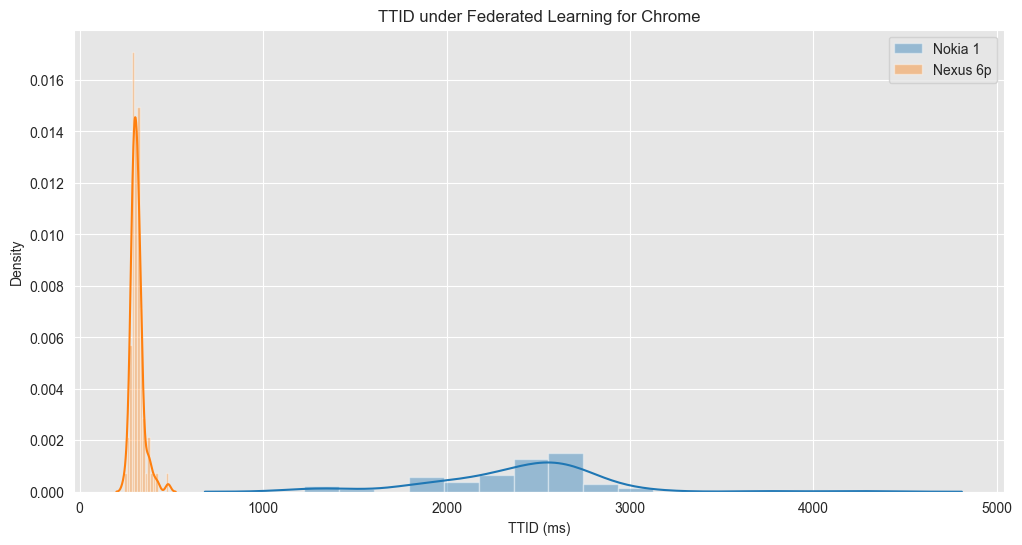

Confident Interval:  (2000.371201950979, 2179.3055657257887)
               lower_bound       p_value   upper_bound
package_name                                          
Camera         2899.075017  5.151872e-32   3636.662357
Chrome         2000.371202  8.629060e-69   2179.305566
Youtube       10324.458294  8.470994e-57  11567.979554


In [21]:
#nokia vs nexus 
#alternate hypothesis: mean of nokia > mean of nexus
#null hypothesis: mean of nokia <= mean of nexus
filter_df = df[(df['mobile_name'] == 'nokia 1') | (df['mobile_name'] == 'nexus 6p')]
p_val = []
lower_bound = []
upper_bound = []
for package_name in unique_package_names:
    package_filter_df = filter_df[filter_df['package_name'] == package_name]
    package_filter_df_nokia = package_filter_df[package_filter_df['mobile_name'] == 'nokia 1']
    package_filter_df_nexus = package_filter_df[package_filter_df['mobile_name'] == 'nexus 6p']
    plt.figure(figsize=(12, 6))
    

    sns.distplot(package_filter_df_nokia['ttid_under_FL'], label='Nokia 1')
    sns.distplot(package_filter_df_nexus['ttid_under_FL'], label='Nexus 6p')
    plt.xlabel('TTID (ms)')
    plt.ylabel('Density')
    plt.legend()
    plt.title('TTID under Federated Learning for ' + package_name)
    plt.show()

    t_test = stats.ttest_ind(package_filter_df_nokia['ttid_under_FL'], package_filter_df_nexus['ttid_under_FL'], equal_var=False, alternative='greater')
    diff = package_filter_df_nokia['ttid_under_FL'].mean() - package_filter_df_nexus['ttid_under_FL'].mean()

    
    std_combined = np.sqrt((package_filter_df_nokia['ttid_under_FL'].std()**2 / len(package_filter_df_nokia['ttid_under_FL'])) + (package_filter_df_nexus['ttid_under_FL'].std()**2 / len(package_filter_df_nexus['ttid_under_FL'])))
    error_term = 1.96* std_combined
    confident_interval = (diff - error_term, diff + error_term)
    # confident_interval = stats.t.interval(0.95, len(package_filter_df_nokia['ttid_under_FL'])-1, loc=diff, scale=stats.sem(package_filter_df_nokia['ttid_under_FL'] - package_filter_df_nexus['ttid_under_FL']))
    # print(package_name, t_test)
    print("Confident Interval: ", confident_interval)
    p_val.append(t_test[1])
    lower_bound.append(confident_interval[0])
    upper_bound.append(confident_interval[1])

# #create a dataframe
data = {
'package_name': unique_package_names,
'p_value': p_val,
'lower_bound': lower_bound,
'upper_bound': upper_bound
}
t_test_df = pd.DataFrame(data)
#df = pd.DataFrame(data)

# Create a pivot table

pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                            index=['package_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

# save
# pivot_table.to_csv(f'p_value_nokia_vs_nexus.csv')

print(pivot_table)




cann be explained as same as above. use the pivot table below (see under graphs dont look the above one that is for nokia vs nexus) to see for which app the null is accepted and rejected. again the highend samsung s9 plus is not impacted much by FL. 

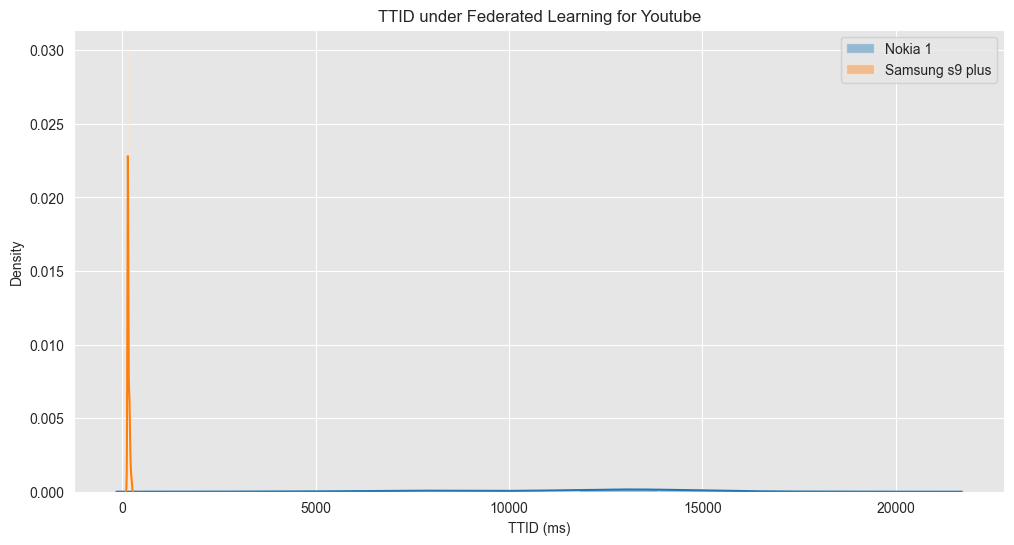

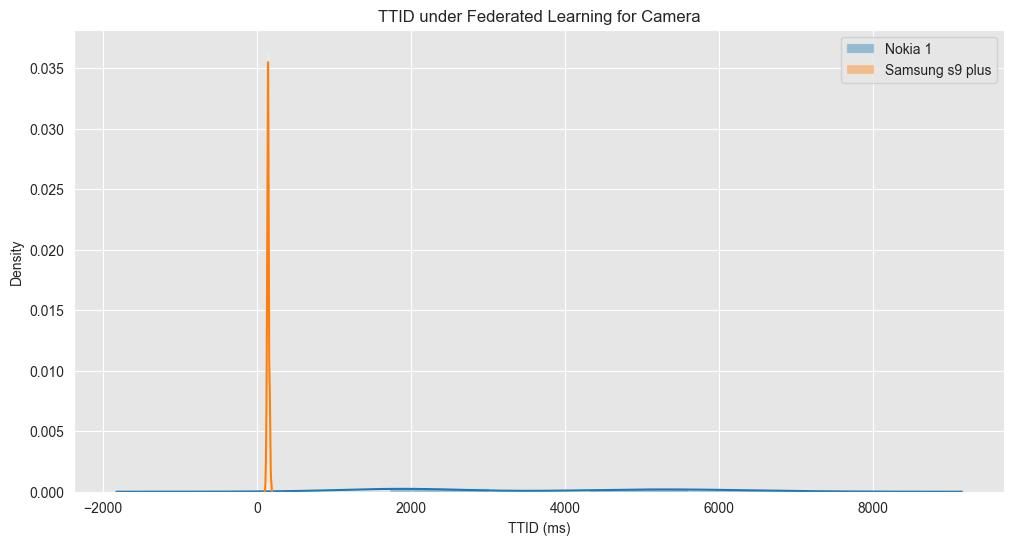

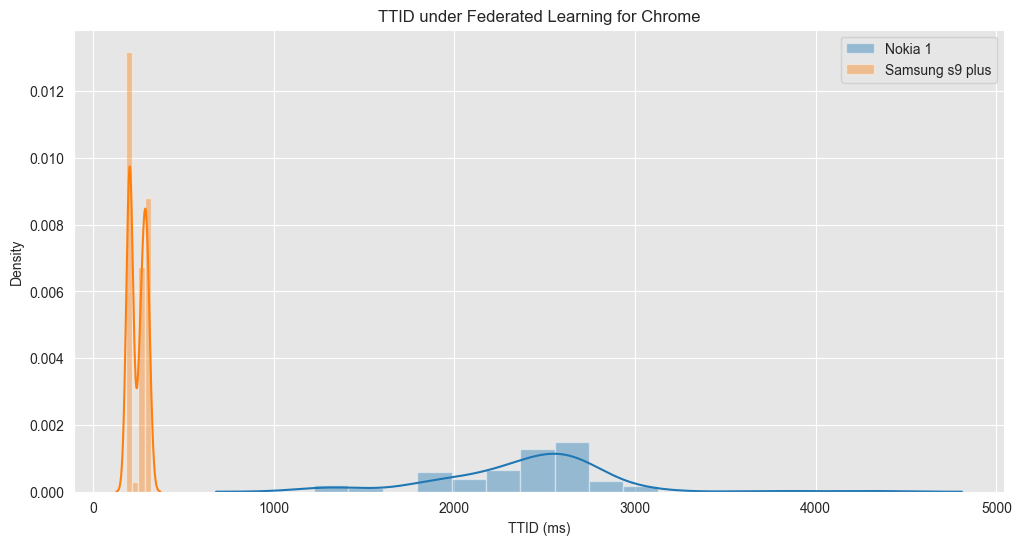

              lower_bound       p_value  upper_bound
package_name                                        
Camera        1721.304653  2.463826e-34  2458.372115
Chrome        2000.209302  2.716140e-70  2179.467466
Youtube       1469.063812  1.016571e-57  2710.612955


In [22]:
#nokia vs samsung s9 plus
#alternate hypothesis: mean of nokia > mean of samsung s9 plus
#null hypothesis: mean of nokia <= mean of samsung s9 plus
filter_df = df[(df['mobile_name'] == 'nokia 1') | (df['mobile_name'] == 'samsung s9 plus')]
p_val = []
lower_bound = []
upper_bound = []
for package_name in unique_package_names:
    package_filter_df = filter_df[filter_df['package_name'] == package_name]
    package_filter_df_nokia = package_filter_df[package_filter_df['mobile_name'] == 'nokia 1']
    package_filter_df_samsung = package_filter_df[package_filter_df['mobile_name'] == 'samsung s9 plus']
    plt.figure(figsize=(12, 6))
    

    sns.distplot(package_filter_df_nokia['ttid_under_FL'], label='Nokia 1')
    sns.distplot(package_filter_df_samsung['ttid_under_FL'], label='Samsung s9 plus')
    plt.xlabel('TTID (ms)')
    plt.ylabel('Density')
    plt.legend()
    plt.title('TTID under Federated Learning for ' + package_name)
    plt.show()

    t_test = stats.ttest_ind(package_filter_df_nokia['ttid_under_FL'], package_filter_df_samsung['ttid_under_FL'], equal_var=False, alternative='greater')
    std_combined = np.sqrt((package_filter_df_nokia['ttid_under_FL'].std()**2 / len(package_filter_df_nokia['ttid_under_FL'])) + (package_filter_df_samsung['ttid_under_FL'].std()**2 / len(package_filter_df_samsung['ttid_under_FL'])))
    error_term = 1.96* std_combined
    confident_interval = (diff - error_term, diff + error_term)

    # confident_interval = stats.t.interval(0.95, len(package_filter_df_nokia['ttid_under_FL'])-1, loc=package_filter_df_nokia['ttid_under_FL'].mean(), scale=stats.sem(package_filter_df_nokia['ttid_under_FL']))
    # print(package_name, t_test)
    # print("Confident Interval: ", confident_interval)
    p_val.append(t_test[1])
    lower_bound.append(confident_interval[0])
    upper_bound.append(confident_interval[1])

# #create a dataframe
data = {
'package_name': unique_package_names,
'p_value': p_val,
'lower_bound': lower_bound,
'upper_bound': upper_bound
}
t_test_df = pd.DataFrame(data)
#df = pd.DataFrame(data)

# Create a pivot table

pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                            index=['package_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

# save
# pivot_table.to_csv(f'p_value_nokia_vs_samsung.csv')

print(pivot_table)




Way forward:

for question 1 the treatment group (under fl) and control grp(idle) used same mobile like nokia 1 vs nokia 1 so very controlled experiment in that regards. but even within mobile there can be confounding factors like battery level, and network conditions so for futgure should record those as well to analyze their impact and to control them.

for question 2 we compared ttid under fl for low and highened. an ideal world would be to compare nokia 1 with nokia 1 and just increase ram but that is not possible so compared with nexus 6p and s9. confounding here can be number cores, android version, processor speed. so for future have more mobiles from each category and compare them to see if the results are consistent. or they are affected by other factors. hint toward user study as we have a setup on which we worked over summer. just need to integrated launch time somehow. or amazon aws farm